# SVM : Support Vector Machine

Adalah model machine learning untuk klasifikasi ataupun regresi.

SVM mengkalasifikasi dengan try untuk separate dua kelas dnegan mencari dan menepukan hyperlane terbaik yang memisahkan kelas kelas tersebut dengan margin yang besar.

SVM classificate data with trying to separate two classes with finding the best *hyperlane* that separate that class with the highest *margin*.

Hyperlane Formula for separating two feateure into two classes.

**wᵀ x + b = 0**

With : 

- w is vector weight

- x is vector inputs

- b is bias

- wᵀ is transpose of w


Prection of classes from new input is :

**p = sign(wᵀ xi + b = 0)**


In SVM, we also want to make sure have a maximum number of margin of separated classes.

For positive classes, nearest point from hyperlane defined as :

**wᵀ x + b = 1**

For negative classes, nearest point from hyperlane defines as :

**wᵀ x + b = -1**

Distance between both hyperlane is :

**2/||w||**

Cause our goal is maximum margin, we can minimize the ||w||. with :

**min{w,b} x 1/2 x ||w||²**

with problem : 

**y_i (wᵀ x + b) > = 1**

To solve it we can use optimize method like *Gradient Descent*. In this case the class cant separated linearly, we can use kernel function to mapping data to higher dimentional so we can separated it linearly. One of the function is *Gauss (RBF)*:

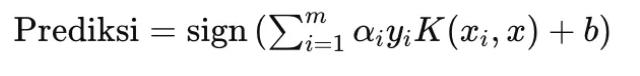

which : 

K(xi,x) us kernel function that calculate distance between two point data xi and x in feature space already higher dimentional after changed by kernel. alpha i is koefficient from vector weight.



## EX.

data dengan 2 fitur x dan y.

Data kelas 0 : [[1,2], [2,3], [3,3]]

Data kelas 1 : [[6,5], [7,7], [8,6]]

First is hyperlane (separater line) thats optimal. so the margin is optimal. 

Hyperlane : **wᵀ x + b = 0**

for finding the best hyperlane we need to find the best w and b value.

For example w = [1,-1] and b = -5.

Hyperlane : x - y - 5 = 0.

Let see if this hyperlane can separated data into two classes.

Data kelas 0 : [[1,2], [2,3], [3,3]]

1(1) - 1(2) - 5 = - 6

1(2) — 1(3) — 5 = — 6

1(3) — 1(3) — 5 = — 5

All values is negative, means all point from class 0 is on the right hyperlane

Data kelas 1 : [[6,5], [7,7], [8,6]]

1(6) — 1(5) — 5 = 1

1(7) — 1(7) — 5 = 0

1(8) — 1(6) — 5 = 1

All values is positive, means all point of class 1 is the right side of hyperlane

So... Hyperlane x - y - 5 = 0 is good.

Lets prodict new data points [4,4]

1(4) - 1(4) - 5 = - 5

This point is negative and will be classified to class 0.

this is the simple example, but we often use *SMO (Sequential Minimal Optimization)*

Lets move on to another example.

Data kelas 0 : [[2,2], [1,3], [3,3]]

Data kelas 1 : [[6,5], [7,7], [8,6]]

Lets calculate and visualize it.

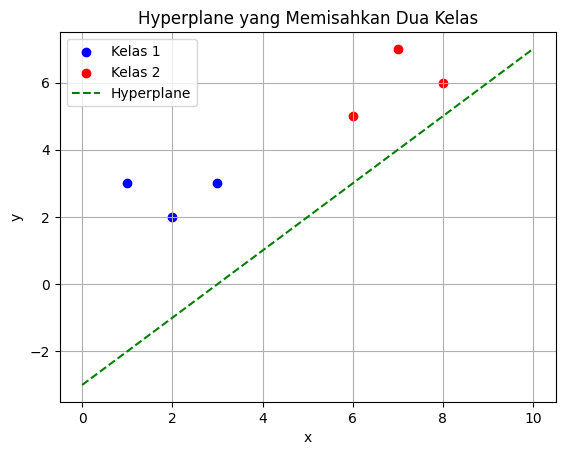

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X1 = np.array([[2, 2], [1, 3], [3, 3]])  # Kelas 1
X2 = np.array([[6, 5], [7, 7], [8, 6]])  # Kelas 2

# Hyperplane
w1, w2, b = 1, -1, -3

# Plot data
plt.scatter(X1[:,0], X1[:,1], color='blue', label='Kelas 1')
plt.scatter(X2[:,0], X2[:,1], color='red', label='Kelas 2')

# Plot hyperplane
xx = np.linspace(0, 10)
yy = (-w1 * xx - b) / w2
plt.plot(xx, yy, color='green', linestyle='--', label='Hyperplane')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Hyperplane yang Memisahkan Dua Kelas')
plt.legend()
plt.grid(True)
plt.show()

on that graphic blue dot is class x and red is y. this hyperlane is made by wx = 1 and wy = - 1  and b = - 3. so.. 

hyperlane = wx + xy + b = 0

remember the weight isnt chosen randomly, the choise is based on how optimal or max value margin will be. we can use *SMO (Sequential Minimal Optimization)*

Lets use it in the code/

Epoch 0: Loss = 1.9926


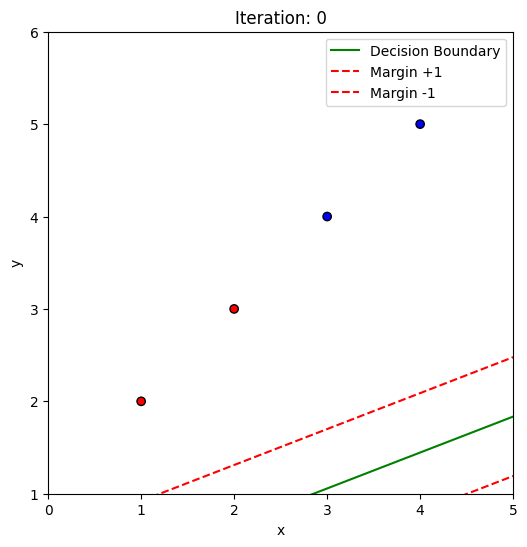

Epoch 200: Loss = 0.8541


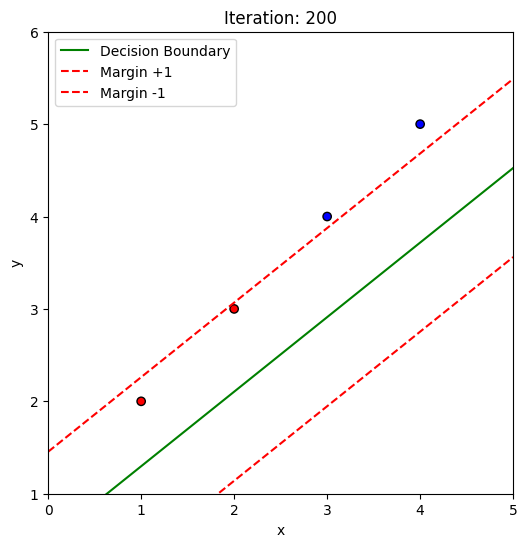

Epoch 400: Loss = 0.7117


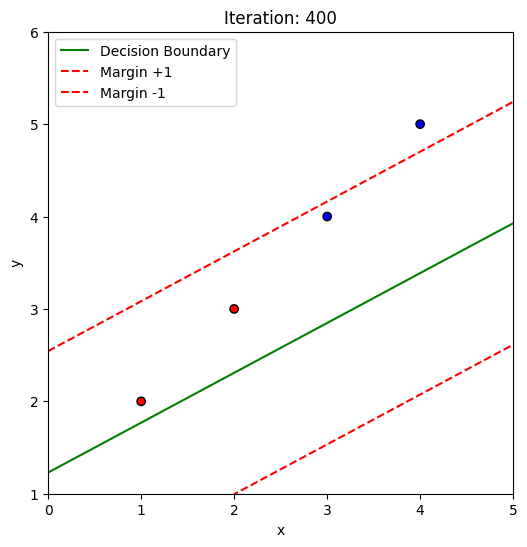

Epoch 600: Loss = 0.5679


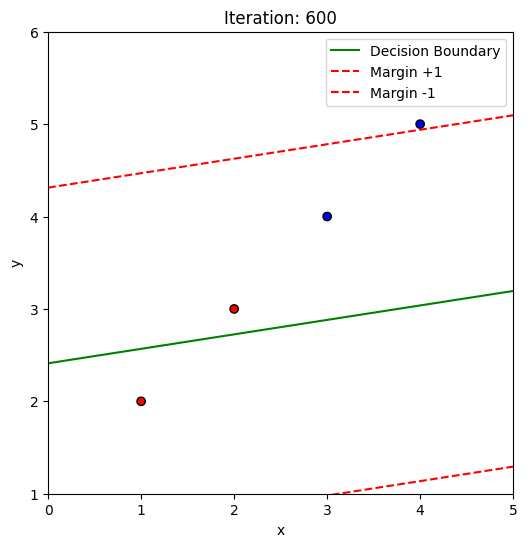

Epoch 800: Loss = 0.4266


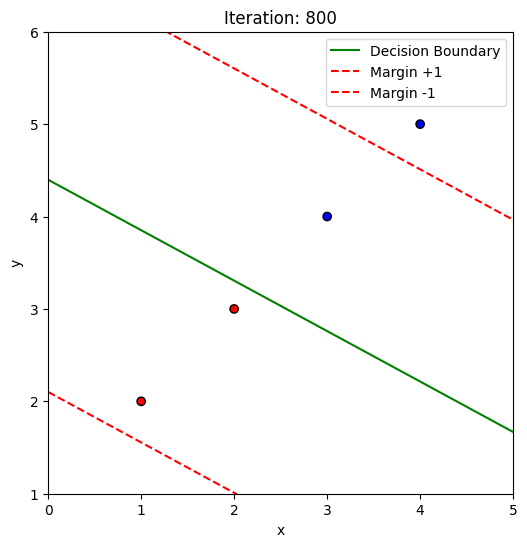

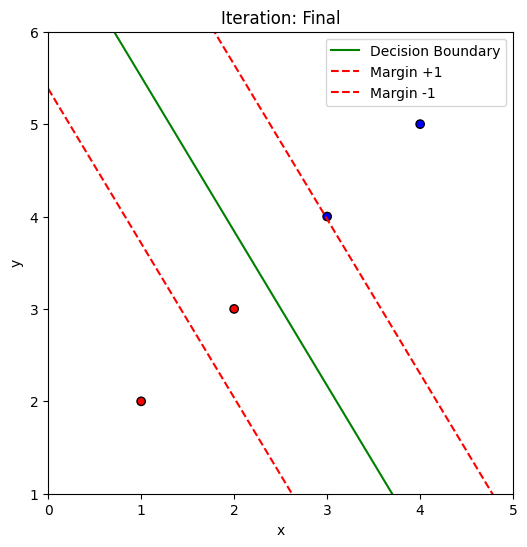

Training selesai!
Bobot (w): [-0.47615584 -0.28467032]
Bias (b): 2.0457455591147466


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Contoh fitur
y = np.array([1, 1, -1, -1])  # Contoh label kelas

# Inisialisasi bobot dan bias secara acak
w = np.random.randn(X.shape[1])  # Inisialisasi bobot
b = np.random.randn()  # Inisialisasi bias

# Definisikan learning rate
learning_rate = 0.01

# Definisikan jumlah iterasi
epochs = 1000

# Fungsi untuk menggambar data dan decision boundary dengan margin lines
def plot_decision_boundary(X, y, w, b, epoch):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Plot decision boundary
    x_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]

    # Plot margin lines
    margin = 1 / np.linalg.norm(w)  # Distance of margin from hyperplane
    y_vals_margin1 = y_vals + margin
    y_vals_margin2 = y_vals - margin
    
    plt.plot(x_vals, y_vals, 'g', label="Decision Boundary")
    plt.plot(x_vals, y_vals_margin1, 'r--', label="Margin +1")
    plt.plot(x_vals, y_vals_margin2, 'r--', label="Margin -1")

    plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Iteration: {epoch}')
    plt.legend()
    plt.show()

# Lakukan training
for epoch in range(epochs):
    # Hitung prediksi
    scores = np.dot(X, w) + b
    
    # Hitung loss dengan menggunakan hinge loss
    margins = y * scores
    loss = np.maximum(0, 1 - margins)
    mean_loss = np.mean(loss)
    
    # Hitung gradien
    grad_w = np.zeros_like(w)
    grad_b = 0
    for i, margin in enumerate(margins):
        if margin < 1:
            grad_w += -y[i] * X[i]
            grad_b += -y[i]
    grad_w /= len(X)
    grad_b /= len(X)
    
    # Update bobot dan bias menggunakan gradien turun
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    
    # Tampilkan visualisasi setiap 200 iterasi
    if epoch % 200 == 0:
        print(f'Epoch {epoch}: Loss = {mean_loss:.4f}')
        plot_decision_boundary(X, y, w, b, epoch)

# Plot hasil akhir
plot_decision_boundary(X, y, w, b, "Final")
print('Training selesai!')
print('Bobot (w):', w)
print('Bias (b):', b)

didefinisikan data fitur X dan label kelas y.
inisialisasi bobot w dan bias b secara acak.
menentukan learning rate (tingkat belajar) dan jumlah iterasi.
melakukan training selama jumlah iterasi yang ditentukan.
Dalam setiap iterasi, dihitung prediksi, loss menggunakan hinge loss, dan gradien.
perbaharui bobot dan bias menggunakan gradien turun.
ditampilkan loss setiap 100 iterasi.
Setelah training selesai, mencetak bobot dan bias yang dihasilkan.

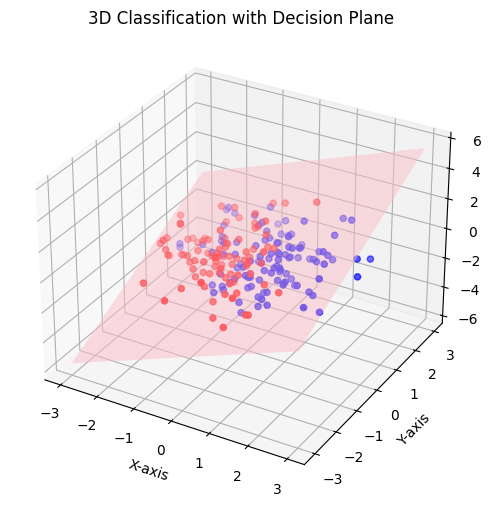

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
n_samples = 200
X = np.random.randn(n_samples, 3)  # 3D points
y = (X[:, 2] > X[:, 0] + X[:, 1]).astype(int)  # Define class (0 or 1)

# Train SVM model
svm = SVC(kernel="linear")
svm.fit(X, y)

# Create a meshgrid for the decision plane
xx, yy = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
zz = (-svm.intercept_[0] - svm.coef_[0, 0] * xx - svm.coef_[0, 1] * yy) / svm.coef_[0, 2]

# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of points
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c="blue", marker="o")
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c="red", marker="o")

# Plot decision plane
ax.plot_surface(xx, yy, zz, color="pink", alpha=0.5)

# Labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Classification with Decision Plane")

plt.show()


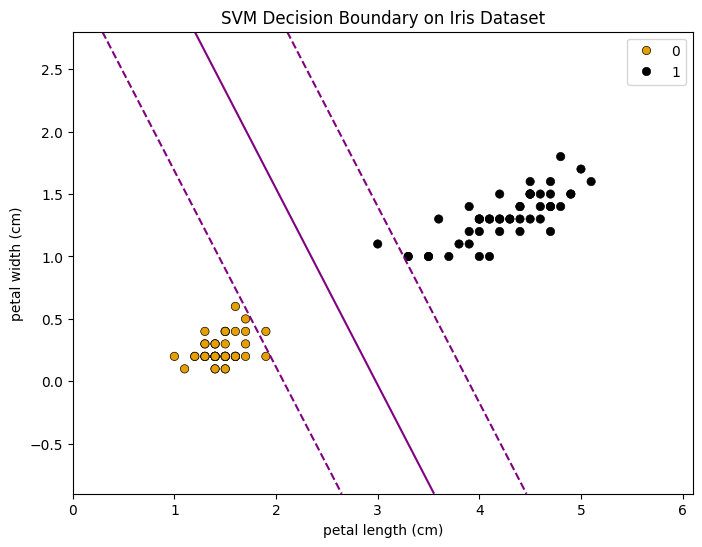

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target

# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Train SVM model
svm = SVC(kernel="linear")
svm.fit(X, y)

# Create a meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision function
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot dataset points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=["#E69F00", "#000000"], edgecolor="k")

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors="purple", levels=[-1, 0, 1], linestyles=["dashed", "solid", "dashed"])

# Labels and title
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("SVM Decision Boundary on Iris Dataset")

plt.show()
